                                    All rights reserved © Global AI Hub 2020 
<div align="center">
  <img src="img/logo.png">
</div>

# Building Machine Learning Project

<div align="center">
  <img src="img/flow.png">
</div>

## Steps of Project

- Gathering Data
- Exploratory Data Analysis
- Preparing the Data 
- Choosing Models
- Training
- Hyperparameter Tuning (Fine Tuning)
- Prediction
- Evaluation
- Comparing Models
- Model Selection

## Gathering Data
After the problem definition, we need to obtain data which will be appropriate for our case.  The quality and quantity of data that you gather will directly determine how good our predictive model can be.

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

###  Random Variables and Probability Distributions
A random variable is a variable that can take on diﬀerent values randomly. We typically denote the random variable itself with a lowercase letter in plain typeface, and the values it can take on with lowercase script letters. For example, x1 and x2 are both possible values that the random variable x can take on. For vector-valued variables, we would write the random variable as x and one of its values as x. On its own, a random variable is just a description of the states that are possible; it must be coupled with a probability distribution that speciﬁes how likely each of these states are.  
<br>
Random variables may be discrete or continuous. A discrete random variable is one that has a ﬁnite or countably infinite number of states. Note that these states are not necessarily the integers; they can also just be named states that are not considered to have any numerical value. A continuous random variable is associated with a real value.

![Prob](img/1.png)
 <h5><center>Random Variables</center></h5>  

![Prob](img/histogram.png)
 <h5><center>Continuous Variable - Histogram (No Gap)</center></h5>      

![](img/bar2.png)
 <h5><center>Discrete Variable - Bar Graph</center></h5>

![Prob](img/overview-prob-distr.png)
 <h5><center>Types of Probabilty Distributions</center></h5>    

### Scatter Plot

![](img/KEdsn.png)

###  Pairplot

![](img/pairplot.png)

###  Word Cloud

![](img/wordcloud.jpg)

## Preparing the Data
Data preparation, where we load our data into a suitable place and prepare it for use in our machine learning training. This is also a good time to do any pertinent visualizations of your data, to help you see if there are any relevant relationships between different variables you can take advantage of, as well as show you if there are any data imbalances.

### Duplicate Values
In most cases, the duplicates are removed so as to not give that particular data object an advantage or bias, when running machine learning algorithms.  

`data.duplicated()`

### Imbalanced Data
An Imbalanced dataset is one where the number of instances of a class(es) are significantly higher than another class(es), thus leading to an imbalance and creating rarer class(es).

![](img/imbalance.png)

### Missing Values

- Eleminate missing values
- Filling with mean or median

`df.isnull().sum() `  
`df.dropna()`

![](img/skew.jpg)

### Outlier Detection

- Standart Deviation
- Box Plots / IQR Calculation
- Isolation Forest


`from sklearn.ensemble import IsolationForest`

![](img/stddev.png)

![](img/IQR.png)

### Feature Scaling

- Standardization  
$$  X_{new} = \frac{X-\mu}{\sigma} $$  
- Normalization  
$$X_{new} = \frac{X-X_{min}}{X_{max} - X_{min}} $$ 


![](img/stndr.png)
<h5><center>Standardization</center></h5>  

![](img/norm.png)

### Bucketing (Binning)

Data binning, bucketing is a data pre-processing method used to minimize the effects of small observation errors (noisy data). The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin.  

![](img/binning.png)

### Feature Extraction
- Principle Components Analysis (PCA)
- Independent Component Analysis (ICA)
- Linear Discriminant Analysis (LDA)
- t-distributed Stochastic Neighbor Embedding (t-SNE)

Example:  
$$Profit = Revenue - Cost$$

### Feature Encoding
Feature encoding is basically performing transformations on the data such that it can be easily accepted as input for machine learning algorithms while still retaining its original meaning.

- **Nominal** : Any one-to-one mapping can be done which retains the meaning. For instance, a permutation of values like in One-Hot Encoding.
- **Ordinal** : An order-preserving change of values. The notion of small, medium and large can be represented equally well with the help of a new function. For example, we can encode this S, M and L sizes into {0, 1, 2} or maybe {1, 2, 3}.

![](img/encode.png)

### Train / Validation / Test Split
But before we start deciding the algorithm which should be used, it is always advised to split the dataset into 2 or sometimes 3 parts. Machine Learning algorithms, or any algorithm for that matter, has to be first trained on the data distribution available and then validated and tested, before it can be deployed to deal with real-world data.  

- 60 / 20 / 20
- 70 / 30

`from sklearn.model_selection import train_test_split`

![](img/split.png)

---

![](img/cross_valid.png)
  
`from sklearn.model_selection import cross_validate`


## Evaluation for Classification Problems

![](img/acc.png)
<h5><center>Confusion Matrix</center></h5>  

---

# Churn Prediction Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

import plotly.express as px

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, r2_score 
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, plot_precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv
data = pd.read_csv("dataset/churn_v2.csv")
data.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0    0.0         127.0              1.0       0.0        0.0            2.0   
1    0.0          99.0              1.0       0.0        0.0            3.0   
2    0.0          98.0              1.0       0.0        0.0            1.0   
3    0.0         106.0              1.0       0.0        0.0            2.0   
4    0.0         123.0              1.0       0.0        0.2            1.0   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    220.2     108.0           54.0        9.42      11.7  
1    200.0      66.0           44.0        5.40      11.4  
2    169.9      77.0           41.0        6.92       8.5  
3    147.9      97.0           43.0       10.47       8.8  
4    209.4      49.0           58.0       11.87       9.8

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3335 non-null   float64
 1   AccountWeeks     3334 non-null   float64
 2   ContractRenewal  3335 non-null   float64
 3   DataPlan         3335 non-null   float64
 4   DataUsage        3334 non-null   float64
 5   CustServCalls    3335 non-null   float64
 6   DayMins          3334 non-null   float64
 7   DayCalls         3333 non-null   float64
 8   MonthlyCharge    3334 non-null   float64
 9   OverageFee       3335 non-null   float64
 10  RoamMins         3335 non-null   float64
dtypes: float64(11)
memory usage: 286.7 KB


In [4]:
#Duplicated Check
data.duplicated().sum()

0

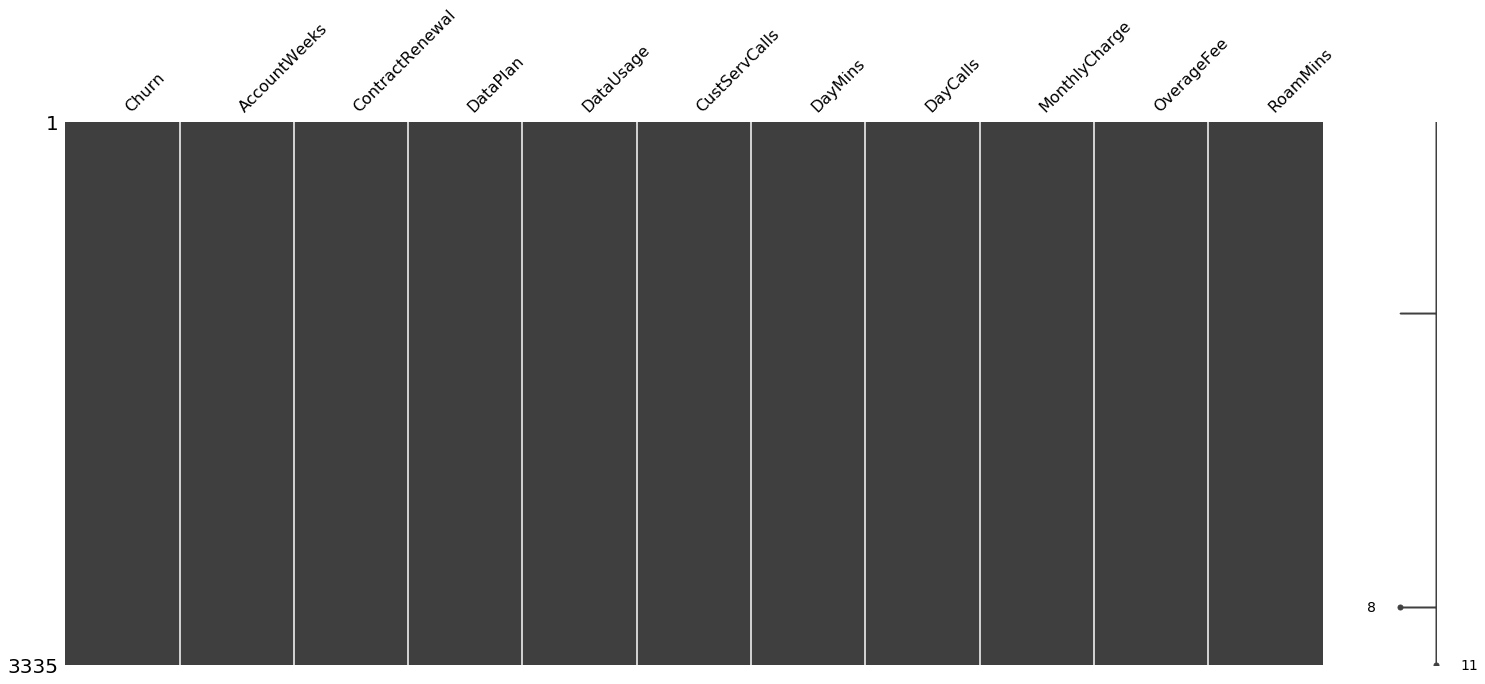

In [6]:
import missingno as msno
msno.matrix(data)

In [7]:
data.isna().sum()

Churn              0
AccountWeeks       1
ContractRenewal    0
DataPlan           0
DataUsage          1
CustServCalls      0
DayMins            1
DayCalls           2
MonthlyCharge      1
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
data.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3335.000000   3334.000000      3335.000000  3335.000000  3334.000000   
mean      0.144828    101.064487         0.903148     0.276462     0.816230   
std       0.351980     39.816136         0.295800     0.447315     1.272556   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3335.000000  3334.000000  3333.000000    3334.000000  3335.000000   
mean        1.562519   179.774325   100.435644      56.304169    10.051445   
std         1.315169    54.459236    20.069084      16.423667     2.534952   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.375000   114.000000      66.175000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3335.000000  
mean     10.237271  
std       2.791002  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

# Exploratory Data Analysis

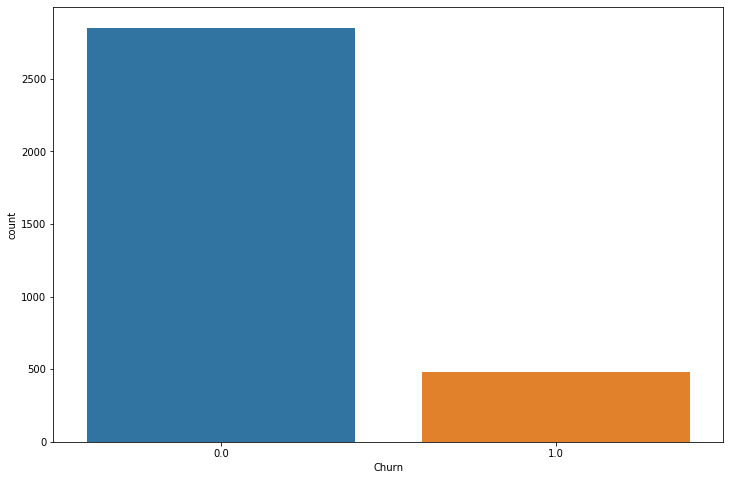

In [9]:
# Our label Distribution (countplot)
sns.countplot(data.Churn)

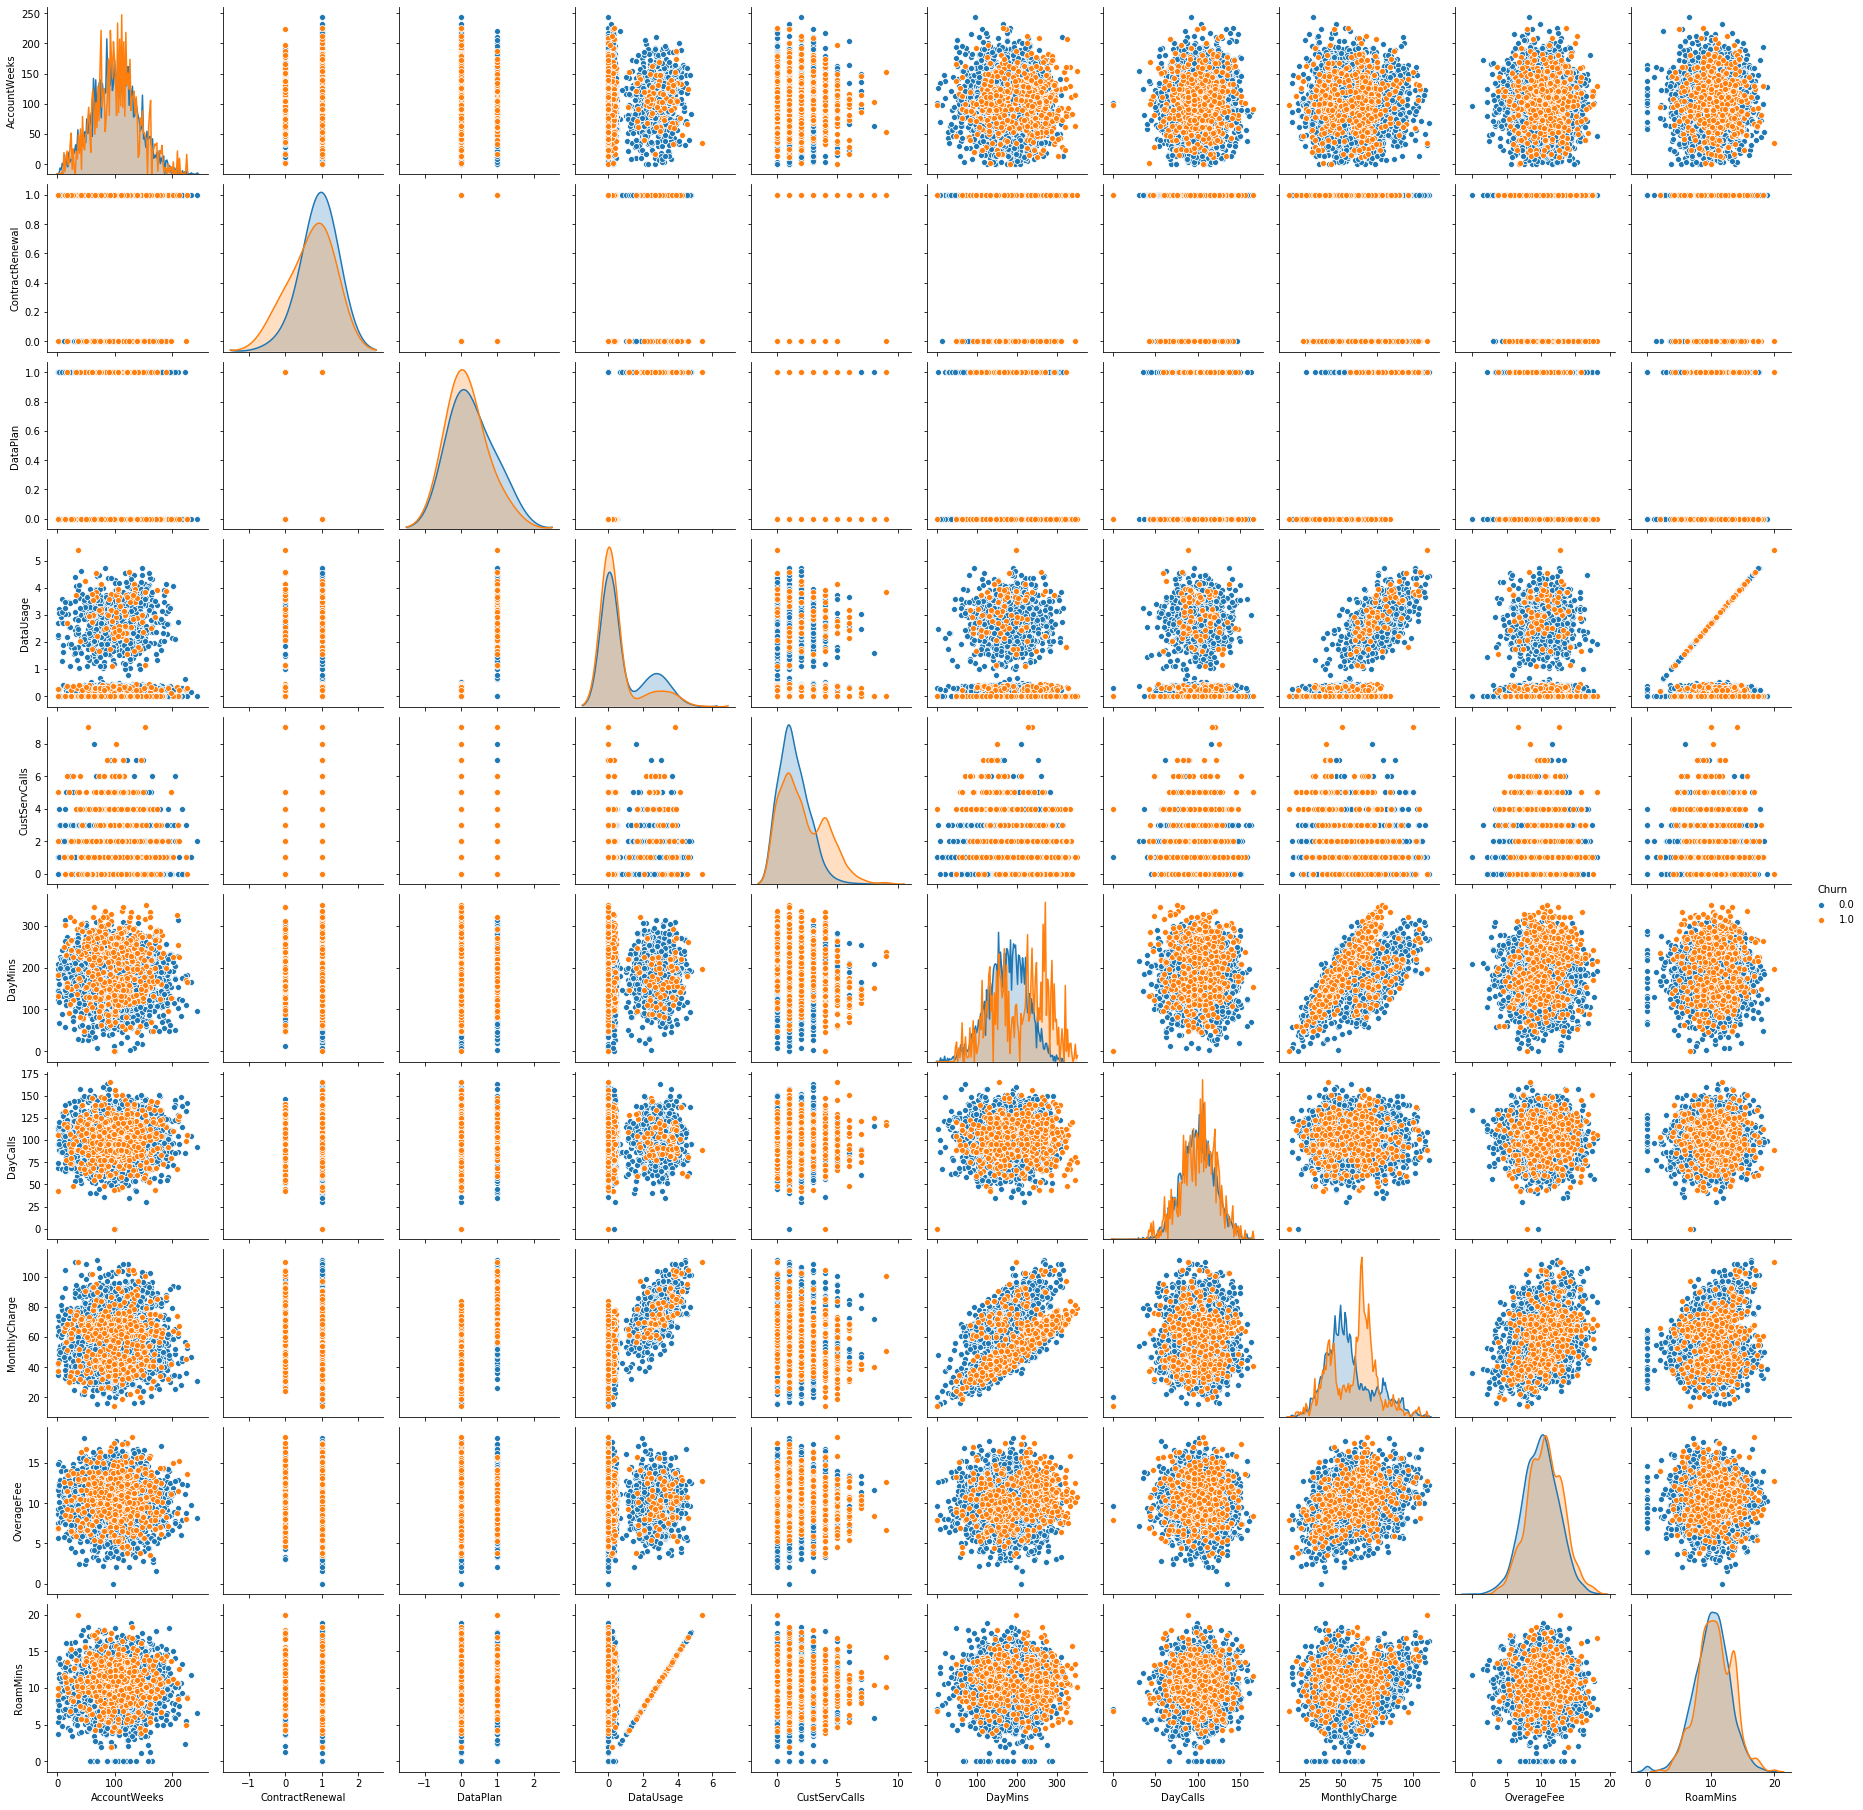

In [10]:
sns.pairplot(data, hue = "Churn", diag_kws={'bw': 0.5})

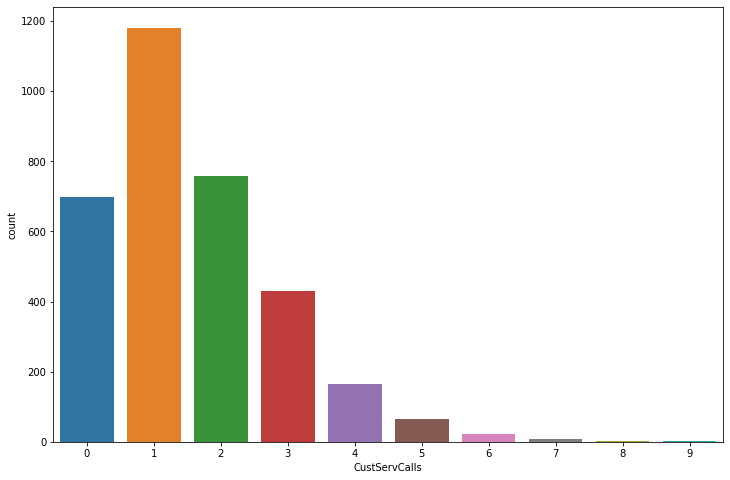

In [4]:
sns.countplot(data.CustServCalls)

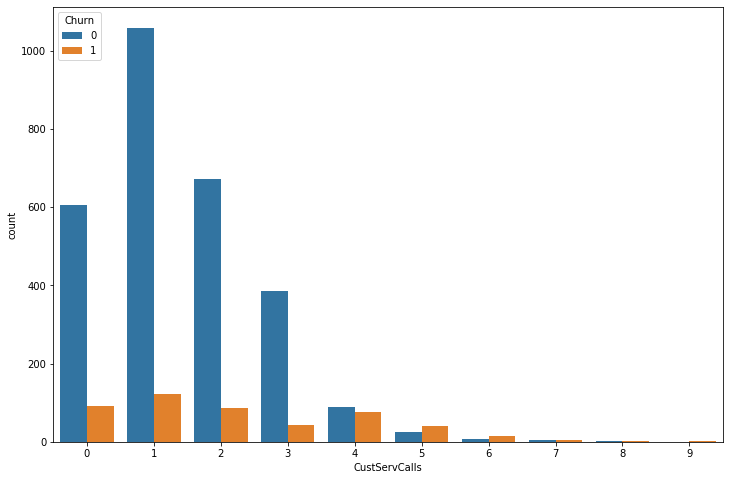

In [19]:
sns.countplot(data.CustServCalls, hue= data.Churn)

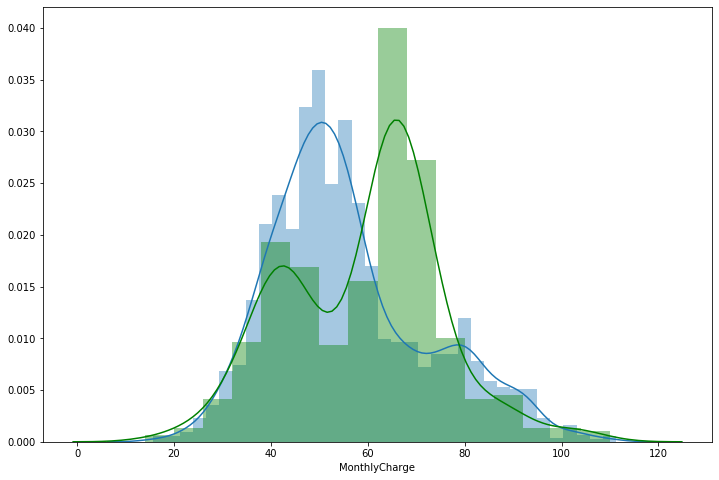

In [9]:
sns.distplot(data[data.Churn == 0].MonthlyCharge)
sns.distplot(data[data.Churn == 1].MonthlyCharge, color="g")

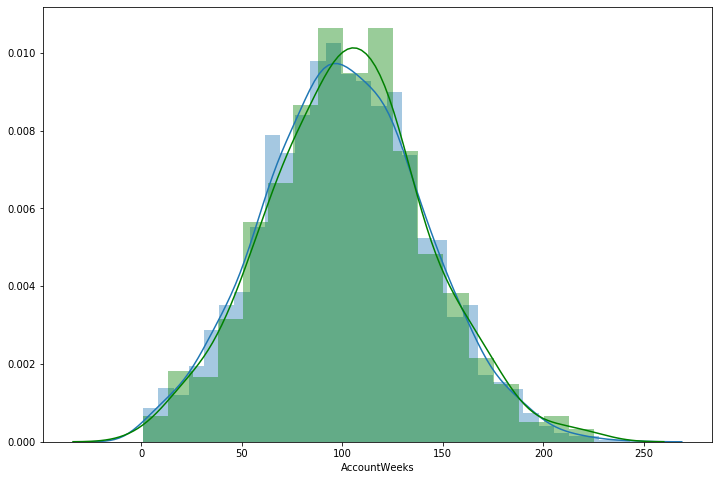

In [20]:
sns.distplot(data[data.Churn == 0].AccountWeeks)
sns.distplot(data[data.Churn == 1].AccountWeeks, color="g")

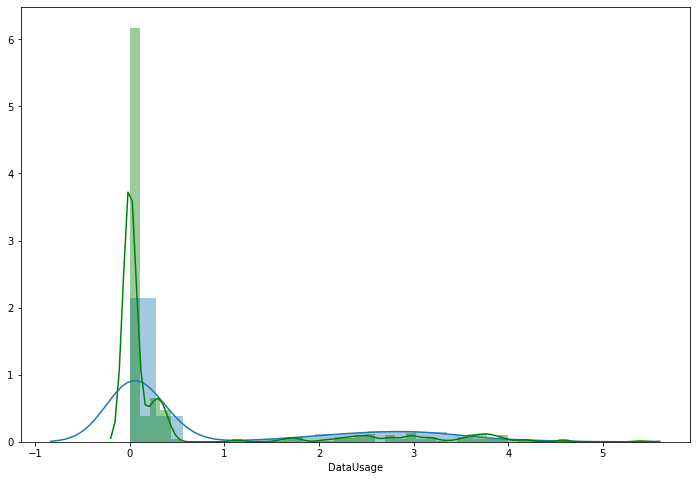

In [21]:
sns.distplot(data[data.Churn == 0].DataUsage)
sns.distplot(data[data.Churn == 1].DataUsage, color="g")

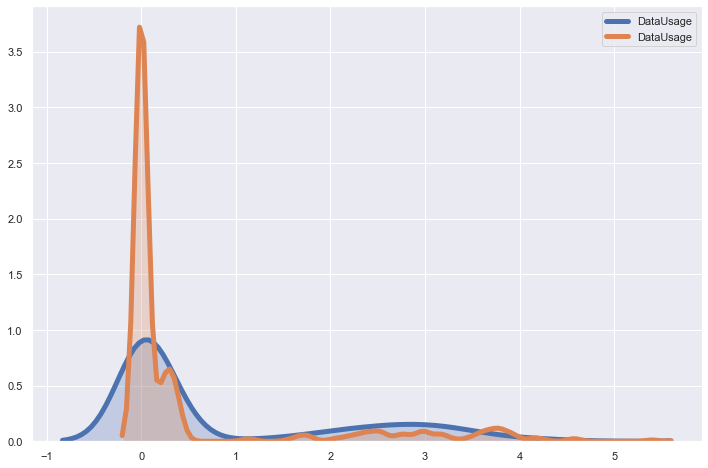

In [19]:
sns.set(style="darkgrid")
sns.kdeplot(data[data.Churn == 0].DataUsage, shade = True, linewidth = 5)
sns.kdeplot(data[data.Churn == 1].DataUsage, shade = True, linewidth = 5)

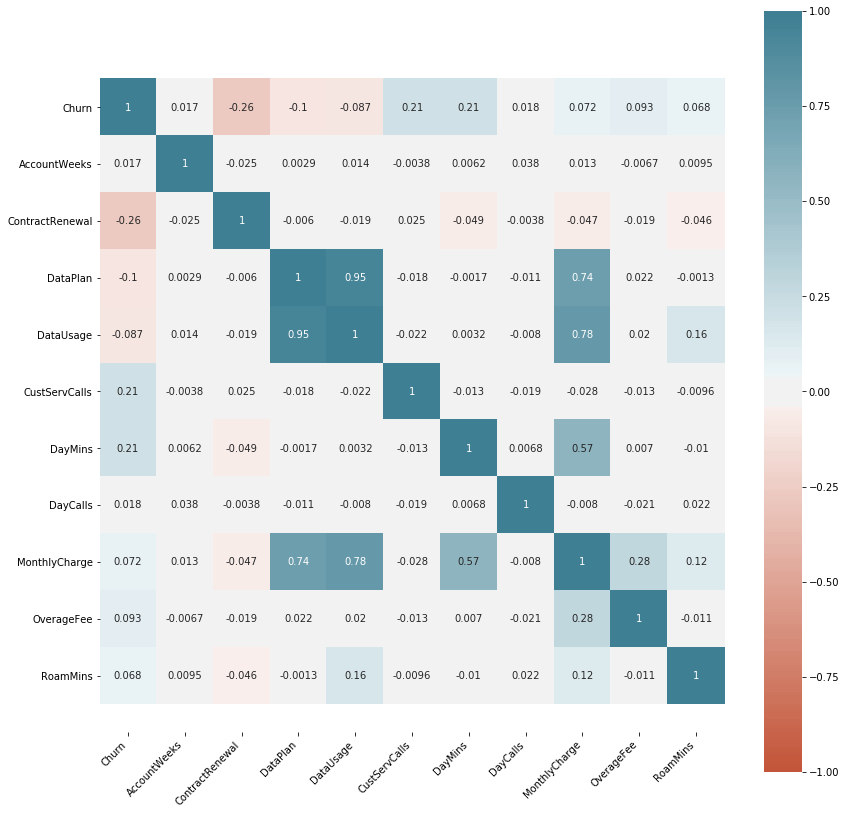

In [11]:
# Correlation of the features
import seaborn as sns
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [22]:
data.duplicated().sum()

0

In [3]:
data.isna().sum()

Churn              0
AccountWeeks       1
ContractRenewal    0
DataPlan           0
DataUsage          1
CustServCalls      0
DayMins            1
DayCalls           2
MonthlyCharge      1
OverageFee         0
RoamMins           0
dtype: int64

In [12]:
data = data.fillna(data.median())
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [13]:
# Outlier detection
from sklearn.ensemble import IsolationForest

temp = data.drop("Churn", axis=1)

outliers = IsolationForest(random_state=0).fit_predict(temp)
outliers_index = list(np.where(outliers == -1)[0])

del temp
print(f"Outlier Count: {len(outliers_index)} \nSample Count: {len(data)} \nFraction: {round(len(outliers_index)/len(data),3)}")

Outlier Count: 594 
Sample Count: 3335 
Fraction: 0.178


Due to the high number of outliers in IsolationForest, we can assume that this values are not outliers. We can go without removing them to see performance.  
Check `contamination` variable in IsolationForest [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(data, data["Churn"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [15]:
train_prop = strat_train_set["Churn"].sum() / len(strat_train_set)
test_prop = strat_test_set["Churn"].sum() / len(strat_test_set)
print(f"Proportion of churns in train set: {round(train_prop,3)}\nProportion of churns in test set: {round(test_prop,3)}")

Proportion of churns in train set: 0.145
Proportion of churns in test set: 0.145


In [16]:
#Split
X_train, y_train = strat_train_set.drop("Churn", axis=1), strat_train_set["Churn"]
X_test, y_test = strat_test_set.drop("Churn", axis=1), strat_test_set["Churn"]
X_train.head()

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
2477          80.0              1.0       0.0        0.0            1.0   
1113         109.0              1.0       0.0        0.0            3.0   
3180         112.0              1.0       0.0        0.0            1.0   
1213          51.0              1.0       0.0        0.0            1.0   
562          112.0              1.0       0.0        0.0            3.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2477    197.6      83.0           48.0        8.23       6.4  
1113    154.8      82.0           51.0       14.39       5.9  
3180     81.6      94.0           37.0       13.41       8.6  
1213    229.7     129.0           68.0       16.80       9.6  
562     214.8     112.0           55.0       10.49       9.4

In [17]:
#Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
#Fit on train
scaler.fit(X_train)

#Transform on both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 
X_train_scaled[0]

array([0.32644628, 1.        , 0.        , 0.        , 0.11111111,
       0.56978085, 0.52531646, 0.35416667, 0.4647092 , 0.32      ])

In [19]:
import joblib 
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

Here is a good [post](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/) about saving models.

# ML Application

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled,y_train)
print("Accuracy of train:",logreg.score(X_train_scaled,y_train))
print("Accuracy of test:",logreg.score(X_test_scaled,y_test))

Accuracy of train: 0.8624678663239075
Accuracy of test: 0.8591408591408591


In [85]:
pred_logreg = logreg.predict(X_test_scaled)
print("Precision = {}".format(precision_score(y_test, pred_logreg))) # Best metric for our case, cost of False Positive is high
print("Recall = {}".format(recall_score(y_test, pred_logreg)))
print("Accuracy = {}".format(accuracy_score(y_test, pred_logreg)))
print("F1 Score = {}".format(f1_score(y_test, pred_logreg)))

Precision = 0.5476190476190477
Recall = 0.15862068965517243
Accuracy = 0.8591408591408591
F1 Score = 0.24598930481283426


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)
print("Accuracy of train:",dt.score(X_train_scaled,y_train))
print("Accuracy of test:",dt.score(X_test_scaled,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.8711288711288712


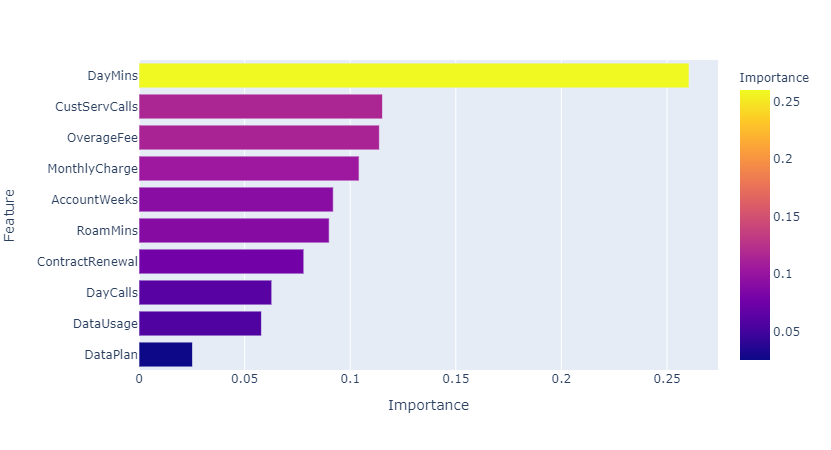

In [25]:
fi_dt = pd.DataFrame({'Feature':X_train.columns,
       'Importance':dt.feature_importances_}).sort_values(by = "Importance",ascending = True).reset_index(drop = True)
       
fig = px.bar(fi_dt, x='Importance', y='Feature',orientation='h',color='Importance')
fig.show()

In [26]:
X_trains_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_tests_df = pd.DataFrame(X_test_scaled, columns= X_train.columns)
X_trains_df.head()

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0.326446              1.0       0.0        0.0       0.111111   
1      0.446281              1.0       0.0        0.0       0.333333   
2      0.458678              1.0       0.0        0.0       0.111111   
3      0.206612              1.0       0.0        0.0       0.111111   
4      0.458678              1.0       0.0        0.0       0.333333   

    DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0  0.569781  0.525316       0.354167    0.464709     0.320  
1  0.446367  0.518987       0.385417    0.812535     0.295  
2  0.235294  0.594937       0.239583    0.757199     0.430  
3  0.662341  0.816456       0.562500    0.948617     0.480  
4  0.619377  0.708861       0.427083    0.592321     0.470

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_trains_df,y_train)
print("Accuracy of train:",dt.score(X_trains_df,y_train))
print("Accuracy of test:",dt.score(X_tests_df,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.8711288711288712


In [28]:
#RFE
X_trains_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_tests_df = pd.DataFrame(X_test_scaled, columns= X_train.columns)

val_t = 0
val_s = 0
val_p = 0
fi_dt = fi_dt.sort_values(by = "Importance",ascending = False)

for i in fi_dt.index:
    cols = fi_dt.Feature[0:i+1]
    model = DecisionTreeClassifier(random_state = 42).fit(X_trains_df.loc[:,cols],y_train)
    tem_pred = model.predict(X_tests_df.loc[:,cols])
    tr = model.score(X_trains_df.loc[:,cols],y_train)
    ts = model.score(X_tests_df.loc[:,cols],y_test)
    prec = precision_score(y_test, tem_pred)
    #print(f"Precision for {cols.to_list()}: {prec}")
    if prec > val_p:
        val_p = prec
        val_t = tr
        names = cols.tolist()
        val_s = ts
        nof = i + 1
        
print("Optimum number of features: {}".format(nof))
print('Selected features are:',names,"\n")
print('Mean training accuracy with {} features: {:.6f}'.format(nof, val_t))
print("Test accuracy with {} features: {:.6f}".format(nof, val_s))
print("Precision {} features: {:.6f}".format(nof, val_p))

Optimum number of features: 7
Selected features are: ['DayMins', 'CustServCalls', 'OverageFee', 'MonthlyCharge', 'AccountWeeks', 'RoamMins', 'ContractRenewal'] 

Mean training accuracy with 7 features: 1.000000
Test accuracy with 7 features: 0.890110
Precision 7 features: 0.611465


In [103]:
val_p

0.6038961038961039

### Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

param_dict = {
    'max_depth':[2,5,10,25,50,100,200],
    'min_samples_split':[1,2,5,10,20,40],
    'min_samples_leaf': [1,2,3,4,5,10,20,40],
    'ccp_alpha': [0,0.1,0.01,0.001,0.0001]
    
}

dtc = DecisionTreeClassifier(random_state=42)

clf_dt = GridSearchCV(dtc,param_dict,cv=3, n_jobs = -1).fit(X_train_scaled,y_train)

print("Tuned: {}".format(clf_dt.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_dt.best_score_))
print("Train Score {:.6f}".format(clf_dt.score(X_train_scaled,y_train)))
print("Test Score {:.6f}".format(clf_dt.score(X_test_scaled,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_dt.refit_time_))

Tuned: {'ccp_alpha': 0, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 40}
Mean of the cv scores is 0.920737
Train Score 0.937018
Test Score 0.908092
Seconds used for refitting the best model on the train dataset: 0.013000


In [30]:
y_pred_dt = clf_dt.predict(X_test_scaled)

train_ac_dt = clf_dt.best_score_
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test ,y_pred_dt)
time_dt = clf_dt.refit_time_

#Accuracy table generation
res_col = ['Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fitting Time']

dt_result = [train_ac_dt, accuracy_dt, precision_dt, recall_dt, f1_score_dt, time_dt]
dt_result = np.array(dt_result).reshape(1,-1)

f_dt = pd.DataFrame(dt_result,index=['Decision Tree'],columns = res_col)
f_dt

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  \
Decision Tree        0.920737       0.908092   0.696296  0.648276  0.671429   

               Fitting Time  
Decision Tree         0.013

In [31]:
# Feature Selection Hyperparamter
from sklearn.model_selection import GridSearchCV

X_trains_rfe = X_trains_df.loc[:,names]
X_test_rfe = X_tests_df.loc[:,names]

param_dict = {
    'max_depth':[2,5,10,25,50,100,200],
    'min_samples_split':[1,2,5,10,20,40],
    'min_samples_leaf': [1,2,3,4,5,10,20,40],
    'ccp_alpha': [0,0.1,0.01,0.001,0.0001]
    
}

dtc = DecisionTreeClassifier(random_state=42)

clf_dt = GridSearchCV(dtc,param_dict,cv=3, n_jobs = -1).fit(X_trains_rfe,y_train)

print("Tuned: {}".format(clf_dt.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_dt.best_score_))
print("Train Score {:.6f}".format(clf_dt.score(X_trains_rfe,y_train)))
print("Test Score {:.6f}".format(clf_dt.score(X_test_rfe,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_dt.refit_time_))

Tuned: {'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean of the cv scores is 0.919452
Train Score 0.931877
Test Score 0.925075
Seconds used for refitting the best model on the train dataset: 0.009000


In [32]:
y_pred_dt = clf_dt.predict(X_test_rfe)

train_ac_dt = clf_dt.best_score_
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test ,y_pred_dt)
time_dt = clf_dt.refit_time_

#Accuracy table generation
res_col = ['Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fitting Time']

dt_result = [train_ac_dt, accuracy_dt, precision_dt, recall_dt, f1_score_dt, time_dt]
dt_result = np.array(dt_result).reshape(1,-1)

f_dt = pd.DataFrame(dt_result,index=['Decision Tree - RFE'],columns = res_col)
f_dt

Train Accuracy  Test Accuracy  Precision    Recall  \
Decision Tree - RFE        0.919452       0.925075   0.791667  0.655172   

                     F1 Score  Fitting Time  
Decision Tree - RFE  0.716981         0.009

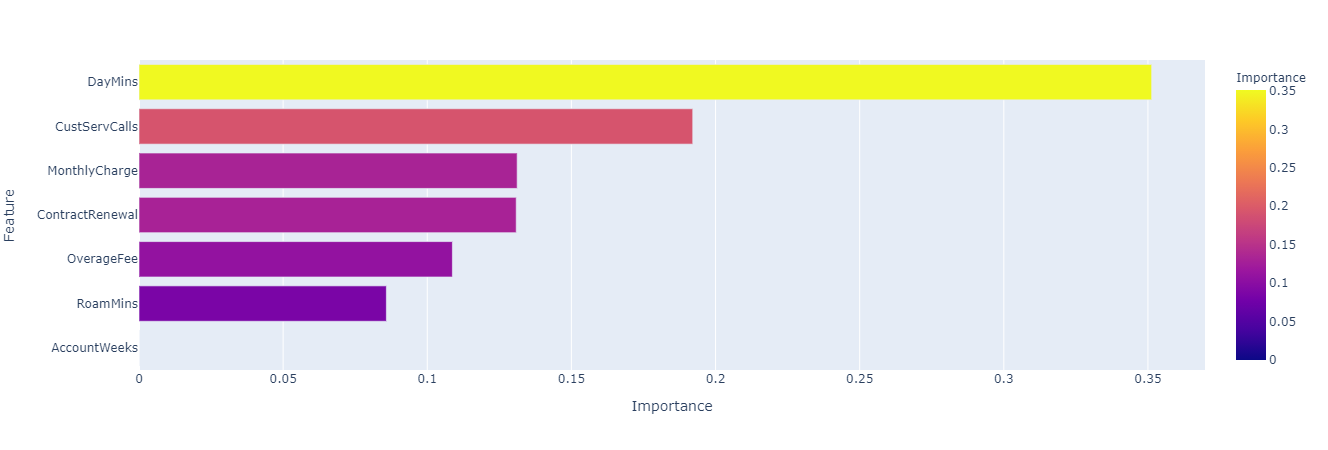

In [29]:
fi_dt = pd.DataFrame({'Feature':X_trains_rfe.columns,
       'Importance':clf_dt.best_estimator_.feature_importances_}).sort_values(by = "Importance",ascending = True).reset_index(drop = True)
       
fig = px.bar(fi_dt, x='Importance', y='Feature',orientation='h',color='Importance')
fig.show()

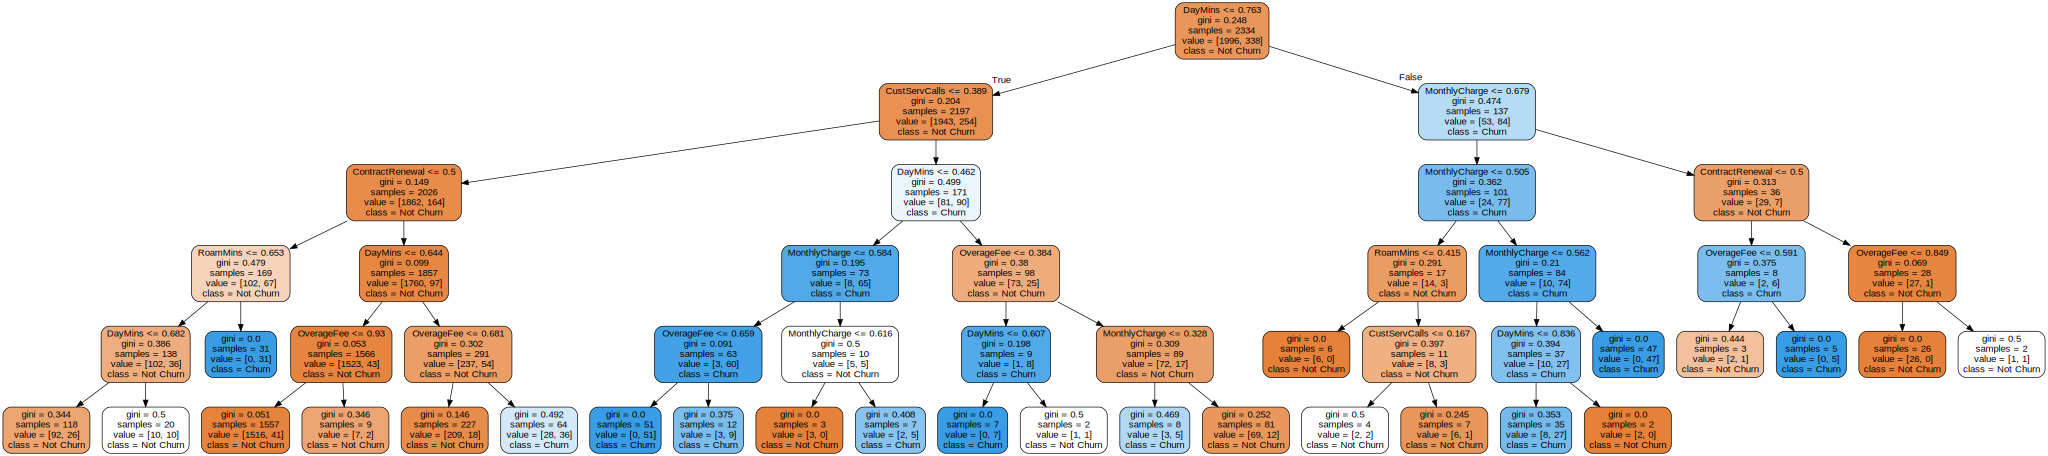

In [32]:
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf_dt.best_estimator_, out_file=None,
                     feature_names=X_trains_rfe.columns,
                     class_names=["Not Churn", "Churn"],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

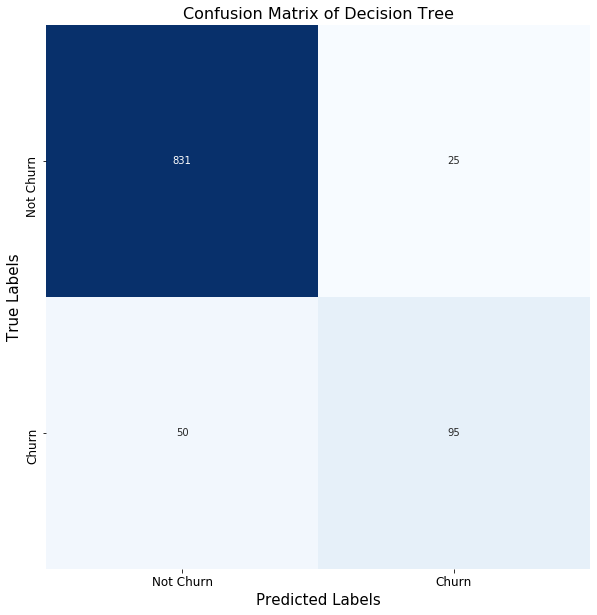

In [34]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14, 10))
y_pred_dt = clf_dt.predict(X_test_rfe)
cm = confusion_matrix(y_test, y_pred_dt)

ax = sns.heatmap(cm, square=True, annot=True, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of Decision Tree',fontsize = 16)
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
plt.show()

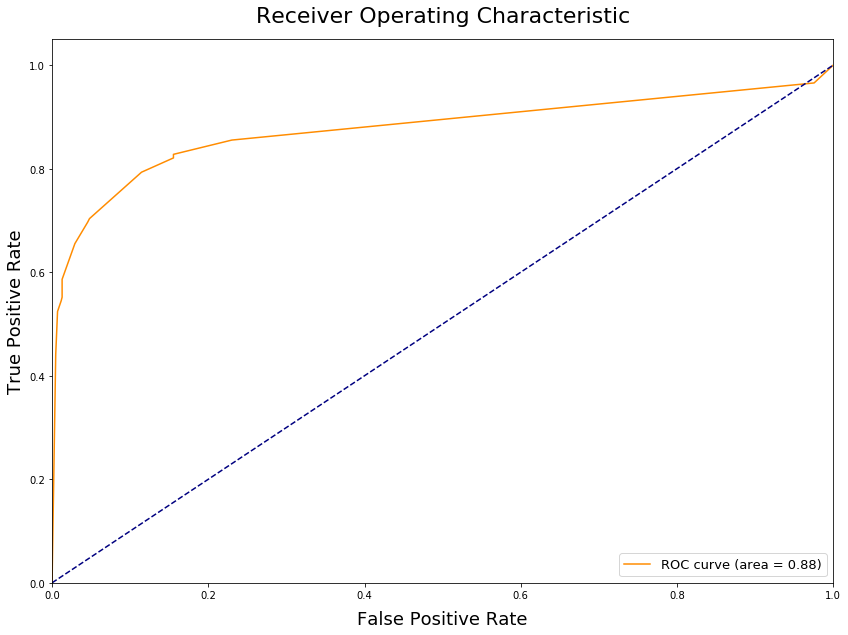

In [36]:
y_pred_prop = clf_dt.predict_proba(X_test_rfe)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prop)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(14, 10))
plt.plot(fpr_dt, tpr_dt, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [33]:
#Save model
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf_dt, open(filename, 'wb'))

In [35]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_rfe, y_test)
print(f"Accuracy of tes:result)

0.9250749250749251


In [37]:
train_ac_dt = clf_dt.best_score_
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test ,y_pred_dt)
time_dt = clf_dt.refit_time_

#Accuracy table generation
res_col = ['Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Fitting Time']

dt_result = [train_ac_dt, accuracy_dt, precision_dt, recall_dt, f1_score_dt, roc_auc_dt, time_dt]
dt_result = np.array(dt_result).reshape(1,-1)

f_dt = pd.DataFrame(dt_result,index=['Decision Tree'],columns = res_col)
f_dt

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  \
Decision Tree        0.919452       0.925075   0.791667  0.655172  0.716981   

                    AUC  Fitting Time  
Decision Tree  0.876478      0.009076

## XGBoost

In [63]:
## Hyperparameter Tuning
from time import time
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

start_xgb = time()
param_dict = {
    'max_depth':[2,5,10,20],
    'min_child_weight': [0.5,1,2],
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [5,10,50,100,500],
    'gamma': [0,0.5,1],
    'reg_lambda': [0, 0.1, 0.01, 0.001]
    }

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc, param_dict, cv=3, n_jobs=-1).fit(X_train_scaled,y_train)

finish_xgb = time()

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train_scaled,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test_scaled,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 500, 'reg_lambda': 0.001}
Mean of the cv scores is 0.936161
Train Score 0.960154
Test Score 0.945055
Seconds used for refitting the best model on the train dataset: 1.322064


In [64]:
print(f"Time passed for hyperparameter tunning: {finish_xgb-start_xgb}")

Time passed for hyperparameter tunning: 1287.9721710681915


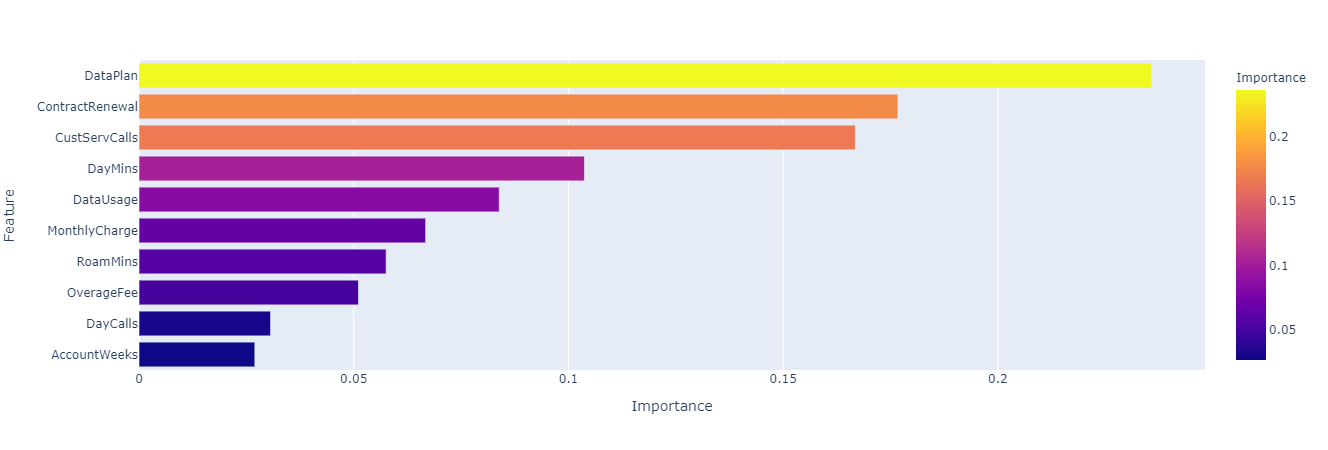

In [65]:
fi_xgb = pd.DataFrame({'Feature':X_train.columns,
       'Importance':clf.best_estimator_.feature_importances_}).sort_values(by = "Importance", ascending = True).reset_index(drop = True)
       
fig = px.bar(fi_xgb, x='Importance', y='Feature',orientation='h',color='Importance')
fig.show()

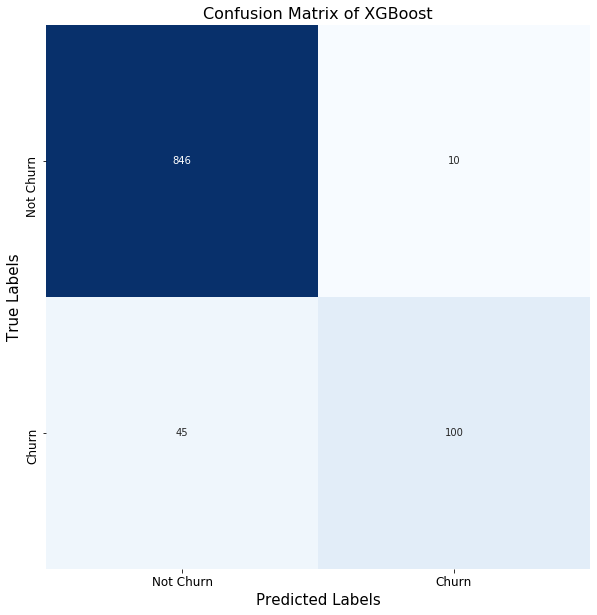

In [70]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(14, 10))

y_pred_xgb = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_xgb)

ax = sns.heatmap(cm, square=True, annot=True, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of XGBoost',fontsize = 16)
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
plt.show()

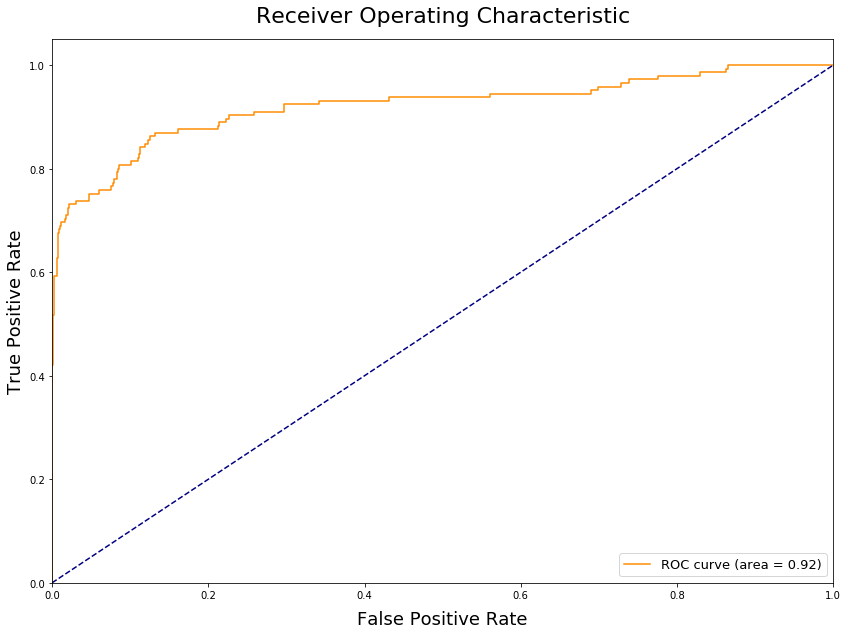

In [68]:
y_pred_prop = clf.predict_proba(X_test_scaled)[:,1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prop)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(14, 10))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [69]:
train_ac_xgb = clf.best_score_
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_score_xgb = f1_score(y_test,y_pred_xgb)
time_xgb = clf.refit_time_

#Accuracy table generation
res_col = ['Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Fitting Time']

xgb_result = [train_ac_xgb, accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb, roc_auc_xgb, time_xgb]
xgb_result = np.array(xgb_result).reshape(1,-1)

f_xgb = pd.DataFrame(xgb_result,index=['XGBoost'],columns = res_col)
f_xgb

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  \
XGBoost        0.936161       0.945055   0.909091  0.689655  0.784314   

              AUC  Fitting Time  
XGBoost  0.920972      1.322064

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       856
         1.0       0.91      0.69      0.78       145

    accuracy                           0.95      1001
   macro avg       0.93      0.84      0.88      1001
weighted avg       0.94      0.95      0.94      1001



## Upsampling

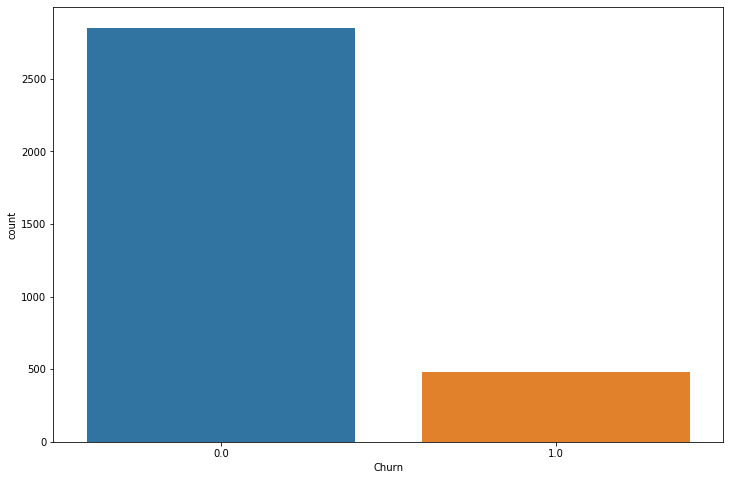

In [8]:
sns.countplot(data.Churn)

In [ ]:
!conda install -c conda-forge imbalanced-learn

In [20]:
X, y = data.drop("Churn", axis=1), data["Churn"]

In [21]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of churn and not churn classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3335, 10)
Shape of X after SMOTE: (5704, 10)

Balance of churn and not churn classes (%):


1.0    50.0
0.0    50.0
Name: Churn, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=123)
print(f"Train: \n{y_train.value_counts(normalize=True) * 100}")
print(f"Test: \n{y_test.value_counts(normalize=True) * 100}")

Train: 
0.0    50.175351
1.0    49.824649
Name: Churn, dtype: float64
Test: 
1.0    50.408879
0.0    49.591121
Name: Churn, dtype: float64


In [23]:
#scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_sm = scaler.transform(X_train)
X_test_sm = scaler.transform(X_test) 
X_train_sm[0]

array([0.35930736, 1.        , 0.        , 0.        , 0.11111111,
       0.2172326 , 0.58895706, 0.15703213, 0.49477735, 0.62115739])

In [24]:
## Hyperparameter Tuning
from time import time
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
start_sm_xgb = time()

param_dict = {
    'max_depth':[2,5,7],
    'min_child_weight': [0.5,0.7,0.9],
    'learning_rate': [0.001,0.01,0.1],
    'n_estimators': [10,50,100],
    'gamma': [0.5,0.75, 1],
    'reg_lambda': [0, 0.1, 0.01, 0.001]
    }

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

clf_sm = GridSearchCV(xgc, param_dict, cv=3, n_jobs=-1).fit(X_train_sm, y_train)

finish_sm_xgb = time()

In [25]:
print("Tuned: {}".format(clf_sm.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_sm.best_score_))
print("Train Score {:.6f}".format(clf_sm.score(X_train_sm,y_train)))
print("Test Score {:.6f}".format(clf_sm.score(X_test_sm,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_sm.refit_time_))

Tuned: {'gamma': 0.75, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 0.7, 'n_estimators': 100, 'reg_lambda': 0}
Mean of the cv scores is 0.956663
Train Score 0.995741
Test Score 0.950935
Seconds used for refitting the best model on the train dataset: 0.529998


In [57]:
print(f"Time passed for hyperparameter tunning: {finish_sm_xgb-start_sm_xgb}")

Time passed for hyperparameter tunning: 233.48659300804138


In [31]:
clf_sm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.75, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=0.7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=27, subsample=0.6, tree_method=None,
              validate_parameters=False, verbosity=None)

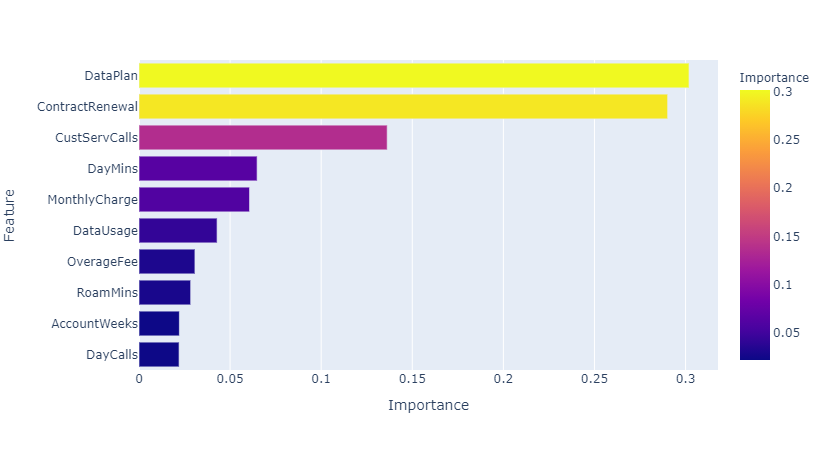

In [32]:
fi_dt = pd.DataFrame({'Feature':X_train.columns,
       'Importance':clf_sm.best_estimator_.feature_importances_}).sort_values(by = "Importance",ascending = True).reset_index(drop = True)
       
fig = px.bar(fi_dt, x='Importance', y='Feature',orientation='h',color='Importance')
fig.show()

In [33]:
import joblib 
joblib.dump(clf_sm.best_estimator_, 'xgb_final.pkl') 

['xgb_final.pkl']

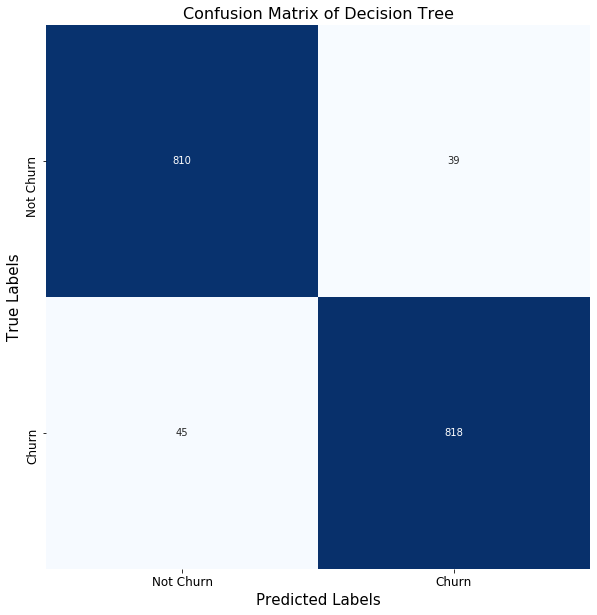

In [15]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(14, 10))

y_pred_smxgb = clf_sm.predict(X_test_sm)
cm = confusion_matrix(y_test, y_pred_smxgb)

ax = sns.heatmap(cm, square=True, annot=True, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of Decision Tree',fontsize = 16)
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_smxgb))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       849
         1.0       0.95      0.95      0.95       863

    accuracy                           0.95      1712
   macro avg       0.95      0.95      0.95      1712
weighted avg       0.95      0.95      0.95      1712



In [17]:
train_ac_xgb = clf_sm.best_score_
accuracy_xgb = accuracy_score(y_test, y_pred_smxgb)
precision_xgb = precision_score(y_test, y_pred_smxgb)
recall_xgb = recall_score(y_test, y_pred_smxgb)
f1_score_xgb = f1_score(y_test, y_pred_smxgb)
time_xgb = clf_sm.refit_time_

y_pred_prop = clf_sm.predict_proba(X_test_sm)[:,1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prop)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

#Accuracy table generation
res_col = ['Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Fitting Time']

xgb_result = [train_ac_xgb, accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb, roc_auc_xgb, time_xgb]
xgb_result = np.array(xgb_result).reshape(1,-1)

f_xgb = pd.DataFrame(xgb_result,index=['XGBoost - Upsampling'],columns = res_col)
f_xgb

Train Accuracy  Test Accuracy  Precision    Recall  \
XGBoost - Upsampling        0.956663       0.950935   0.954492  0.947856   

                      F1 Score       AUC  Fitting Time  
XGBoost - Upsampling  0.951163  0.981486        0.8451